In [23]:
import numpy as np
import pandas as pd

data import


In [24]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [25]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

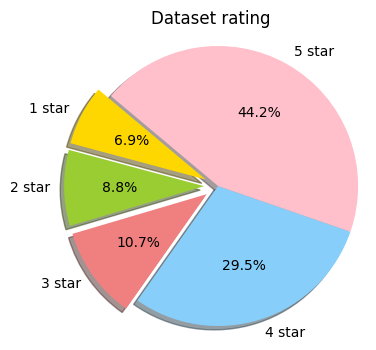

In [26]:
import matplotlib.pyplot as plt
labels = ['1 star', '2 star', '3 star', '4 star' ,'5 star']
sizes = [1421,1793,2184,6039,9054]  
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , 'pink']
explode = (0.1, 0.1, 0.1, 0,0) 
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Dataset rating')
plt.show()

In [27]:
df_neg = df.loc[ df['Rating'] < 3 ] 
df_neg = df_neg.reset_index(drop = True)

In [28]:
df_five = df.loc[df['Rating']==5]
df_five = df_five.reset_index(drop = True)

In [29]:
df_pos = df_five.loc[:len(df_neg)]

In [30]:
df_all = pd.concat([df_neg,df_pos],axis=0)
df_all = df_all.reset_index(drop = True)

In [31]:
len(df_all)

6429

In [32]:
df_all["Sentiment"] = np.where(df_all["Rating"]== 5 , "Positive" , "Negative")

In [33]:
df_all = df_all.sample(frac = 1)
df_all = df_all.reset_index(drop = True)
df_all.head(20)

,Review,Rating,Sentiment
0,visit toronto stayed hotels toronto business v...,5,Positive
1,"early flight, stayed earlier week partly favor...",2,Negative
2,"great hotel unique hotel great location, wante...",5,Positive
3,best service jw marriott mexico city visit mex...,5,Positive
4,"world__Ç excellence 14 nights, excellence hote...",5,Positive
5,"wonderful week not say good things hotel, serv...",5,Positive
6,"service needs major work begin, overrun cruise...",2,Negative
7,"ideal families stayed 2-bed family week, apart...",5,Positive
8,"great hotel stay, gallery hotel art great trip...",5,Positive
9,"think twice booking breezes, just got breezes ...",1,Negative


In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_all.Review , df_all.Sentiment)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

In [36]:
from sklearn import svm 
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(x_train_vec,y_train)

SVC(kernel='linear')

In [37]:
clf_svm.score(x_test_vec,y_test)

0.9521144278606966

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test,clf_svm.predict(x_test_vec) , average = None)

array([0.95249846, 0.95172414])

In [39]:
rev = ["lovely hotel great location beautiful stylish hotel, staff efficient friendly, rooftop bar pool area lovely unfortunately weather fairly overcast stay did n't sample pool cocktails civilised way start end evening, disappointment room overlooked central courtyard natural light room limited,  "]
rev_vec = v.transform(rev) 
clf_svm.predict(rev_vec)

array(['Positive'], dtype=object)

In [40]:
rev = ["absolutely hated this place. horrible place"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

predictions = clf_svm.predict(x_test_vec)


precision = precision_score(y_test, predictions, pos_label='Positive')


recall = recall_score(y_test, predictions, pos_label='Positive')

accuracy = accuracy_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
 

Precision: 0.9559193954659949
Recall: 0.947565543071161
Accuracy: 0.9521144278606966
